In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
%cd /content/drive/My\ Drive/Project/Final_submission/Data

/content/drive/My Drive/Project/Final_submission/Data


In [11]:
import matplotlib.pyplot as plt
from numpy.random import normal
import numpy as np
import os
import pandas as pd

data = pd.read_csv(os.getcwd() + '/Final_Data.csv')

In [13]:
pip install filterpy==1.1.0

     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for filterpy: filename=filterpy-1.1.0-py3-none-any.whl size=85437 sha256=9bc6a6aa32a1ce67d2a76aa204d7e8b126b8ec3d1e315ad1f55d028fcde35f83
  Stored in directory: /root/.cache/pip/wheels/5d/d1/d9/25c124a78a122e9d3b4d9c99daef4f818be8026ace6155de33
Successfully built filterpy


In [14]:
from filterpy.kalman import JulierSigmaPoints

sigmas = JulierSigmaPoints(n=5, kappa=1)

def fx(x, dt):
    a = np.exp(0.1/x[4])
    x[0] = x[0] - (10 * x[1] * x[0]) + (10 * x[2]) #G_s 
    x[2] =  (2 * (x[2])/a) - (x[3]/ a**2) #R_a
    x[1] = x[1] + 10 # p1
    x[4] = x[4] + 10 #t
      
    return x

def hx(x):
    return x[:1] 

In [15]:
from numpy.random import randn
from filterpy.kalman import UnscentedKalmanFilter
from filterpy.common import Q_discrete_white_noise

ukf = UnscentedKalmanFilter(dim_x=5, dim_z=1, dt=100., hx=hx, fx=fx, points=sigmas)
ukf.P *= 1000
ukf.R *= 10e8
ukf.Q = np.array([[10e-6,0,0,0,0],[0,10e-3,0,0,0],[0,0,10e-3,0,0],[0,0,0,10e-2,0],[0,0,0,0,10e-1]])
ukf.x = [118, 0.068,0,0,20]
        #G_s, p_1, R_a(0), R_a(-1), t
zs, xs = [], []
for i in range(len(data)):
    z = data.iloc[i,1].astype(int)
    ukf.predict()
    ukf.update(z)
    xs.append(ukf.x[0])
    zs.append(z)
    



In [16]:
error = 0
for i in range(len(zs)):
    diff = zs[i] - xs[i]
    error += diff**2

In [17]:
error = error/len(zs)

In [18]:
print(error)

0.07472101816824654


In [19]:
accuracy = 100 - error

In [20]:
print(accuracy)

99.92527898183175


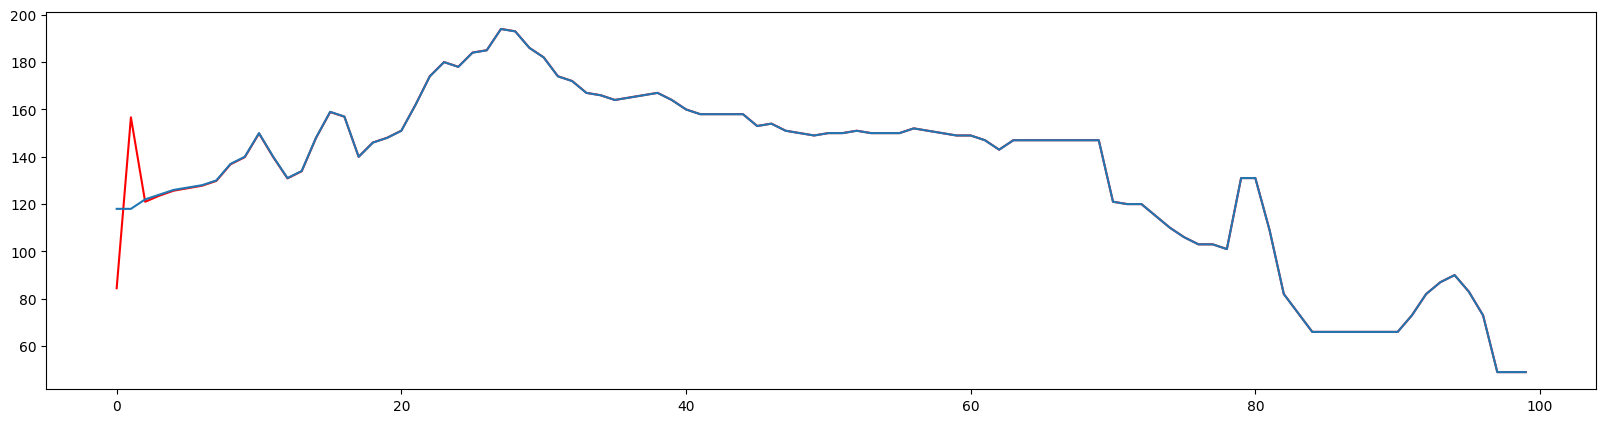

In [21]:
plt.figure(num=None, figsize=(20, 5), dpi=100)
plt.plot(xs[0:100],color='red')
plt.plot(zs[0:100]);